# Machine Learning

![alt text](https://pythonprogramming.net/static/images/svm/machineLearning.png)
### "Campo de estudo que dá aos computadores a habilidade de aprender sem serem explicitamente programados" - Arthur Samuel

## As categorias de ML
### Machine Learning não é uma técnica e sim um conjunto de técnicas <3

![alt text](https://i.pinimg.com/originals/f3/05/34/f3053485f518dd42bf0fc63bb5b23215.png)


- **Aprendizado supervisionado:** São apresentadas ao computador exemplos de entradas e saídas desejadas, fornecidas por um "professor". O objetivo é aprender uma regra geral que mapeia as entradas para as saídas.
- **Aprendizado não supervisionado:** Nenhum tipo de etiqueta é dado ao algoritmo de aprendizado, deixando-o sozinho para encontrar estrutura nas entradas fornecidas. O aprendizado não supervisionado pode ser um objetivo em si mesmo (descobrir novos padrões nos dados) ou um meio para atingir um fim.
- **Aprendizado por reforço:** Um programa de computador interage com um ambiente dinâmico, em que o programa deve desempenhar determinado objetivo (por exemplo, dirigir um veículo). É fornecido, ao programa, feedback quanto a premiações e punições, na medida em que é navegado o espaço do problema. Outro exemplo de aprendizado por reforço é aprender a jogar um determinado jogo apenas jogando contra um oponente.

# Existe um conjunto de passos que servem como guia 
![alt text](http://upxacademy.com/wp-content/uploads/2016/07/Steps-to-Predictive-Modelling.jpg)

# REGRESSÃO LOGÍSTICA

## Predição de valores baseado em uma série de variáveis binárias
É uma técnica estatística que tem como objectivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias

# Vamos tentar prever quem vai sobreviver?

<img src="https://media.giphy.com/media/tk39314j32wGk/giphy.gif" alt="Drawing" style="width: 700px;"/>

# Passo 1 - Capturando os dados

In [344]:
import pandas
titanic_raw = pandas.read_csv("http://bit.ly/suzy-dados")
titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FaixaDeIdade,Sobrenome
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adulto,Braund
1,2,1,1,Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C,adulto,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adulto,Heikkinen
3,4,1,1,Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S,adulto,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adulto,Allen


# Passo 2 - Preparação
### Devemos verificar se o nosso alvo é binário (isso é, 1 ou 0, True ou False)

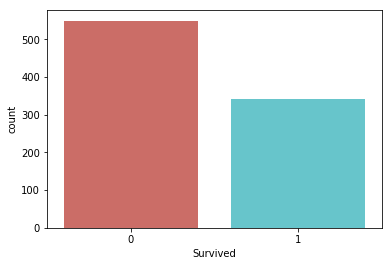

In [191]:
%matplotlib inline
import seaborn as sns

sns.countplot(x='Survived',data=titanic_raw, palette='hls')

### Vamos ver aonde tem valores nulos

In [345]:
titanic_raw.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
FaixaDeIdade    177
Sobrenome         0
dtype: int64

### Já que conhecemos o nosso dataset <3 

- Survived - Essa é a nossa meta, então não podemos apagar!
- Pclass - A classe pode ter um efeito na sobrevivência? Será que tem botes só pra 1?
- Sex - Será que o sexo faz aumentar a sua chance? Botes só para mulheres?
- Age - Será que os mais novos tem mais chance de sobreviver? 
- SibSp - O número de parentes, irmão e conjuges aumenta sua chance de sobreviver?
- Parch - O número de parentes, crianças ou pais aumenta sua chance de sobreviver?
- Fare - Será que quem pagou mais tem mais chance de sobreviver?
- Embarked - Será que aonde a pessoa embarcou interfere? Será que eles ficam mais pertos dos botes?
- PassengerId - Será que o id terminado em par teve mais chance de sobreviver? O identificador dele não parece ajudar para saber quem sobreviveu.
- Name - Será que os Johns tinham mais chance que os Georges?
- Ticket - O número do Ticket é o mesmo caso do PassengerId
- Cabin - Infelizmente não temos muitos dados sobre as cabines
- FaixaDeIdade - Categoriza as idades. Será que as crianças e idosos tem lugares nos barcos?
- Sobrenome - Será que famílias todas sobreviveram?

## Passo 2.1 - Limpeza

#### Colunas que não fazem sentido para nossa predição devem ser removidas para nos ajudar a focar nas importantes

In [346]:
# Para remover um coluna devemos informar ao drop o nome delas e o eixo, o  "axis=1" é a coluna e o "0" a linha
titanic = titanic_raw.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FaixaDeIdade,Sobrenome
0,0,3,male,22.0,1,0,7.2500,S,adulto,Braund
1,1,1,female,38.0,1,0,71.2833,C,adulto,Cumings
2,1,3,female,26.0,0,0,7.9250,S,adulto,Heikkinen
3,1,1,female,35.0,1,0,53.1000,S,adulto,Futrelle
4,0,3,male,35.0,0,0,8.0500,S,adulto,Allen


## Passo 2.2 - Preparação/Manipulação
#### Acabou que geramos a FaixaDeIdade antes da substituição dos nulos nas idades, vamos ter acertar isso!

## <font color='blue'>Como fazemos para gerar as faixa etárias para os que faltam? Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [261]:
ranges = [titanic.Age.min()-1,10,18,40,titanic.Age.max()]
label = ["criança","adolescente","adulto","idoso"]

serie_faixa_etaria = pandas.cut(titanic.Age,ranges,labels=label)
titanic["FaixaDeIdade"] = serie_faixa_etaria

In [262]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FaixaDeIdade,Sobrenome
0,0,3,male,22.0,1,0,7.2500,S,adulto,Braund
1,1,1,female,38.0,1,0,71.2833,C,adulto,Cumings
2,1,3,female,26.0,0,0,7.9250,S,adulto,Heikkinen
3,1,1,female,35.0,1,0,53.1000,S,adulto,Futrelle
4,0,3,male,35.0,0,0,8.0500,S,adulto,Allen


In [263]:
# Agora vou complementar este exercício com uma coluna que diz se a pessoa tem parentes ou não
def parentes(linhas):
    qtd_parentes = linhas["SibSp"] + linhas["Parch"]

    if qtd_parentes > 0:
        return 1
    else:
        return 0
   
        
titanic["parentes"] = titanic.apply(parentes, axis=1)

In [239]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FaixaDeIdade,Sobrenome,parentes
0,0,3,male,22.0,1,0,7.2500,S,adulto,Braund,1
1,1,1,female,38.0,1,0,71.2833,C,adulto,Cumings,1
2,1,3,female,26.0,0,0,7.9250,S,adulto,Heikkinen,0
3,1,1,female,35.0,1,0,53.1000,S,adulto,Futrelle,1
4,0,3,male,35.0,0,0,8.0500,S,adulto,Allen,0


In [264]:
titanic.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        2
FaixaDeIdade    0
Sobrenome       0
parentes        0
dtype: int64

#### Sobraram 2 valores nulos, como isso não é significativo, vamos apagar!

In [265]:
titanic_clean = titanic.dropna()

In [266]:
titanic_clean.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
FaixaDeIdade    0
Sobrenome       0
parentes        0
dtype: int64

## As regressões não sabem lidar com algo diferente de números por isso temos que fazer algumas coisas
### Agora temos que transformar dados para categóricos binários

In [267]:
gender = pandas.get_dummies(titanic_clean['Sex'])
gender.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


#### Podemos apagar um colunas dos sexos pois os dados são complementares

In [268]:
gender = pandas.get_dummies(titanic_clean['Sex'], drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


## <font color='blue'>Façam isso para mais uma coluna que vocês julguem necessárias :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [269]:
embark_location = pandas.get_dummies(titanic_clean['Embarked'])
embark_location.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [270]:
range_age = pandas.get_dummies(titanic_clean['FaixaDeIdade'])
range_age.head()

,criança,adolescente,adulto,idoso
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


### Agora temos que juntar essas colunas que criamos com o dado original

In [271]:
titanic_dmy = pandas.concat([titanic_clean,gender,embark_location,range_age],axis=1)
titanic_dmy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FaixaDeIdade,Sobrenome,parentes,male,C,Q,S,criança,adolescente,adulto,idoso
0,0,3,male,22.0,1,0,7.2500,S,adulto,Braund,1,1,0,0,1,0,0,1,0
1,1,1,female,38.0,1,0,71.2833,C,adulto,Cumings,1,0,1,0,0,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,adulto,Heikkinen,0,0,0,0,1,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,adulto,Futrelle,1,0,0,0,1,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,adulto,Allen,0,1,0,0,1,0,0,1,0


### Temos que checar a correlação entre esses fatos

In [272]:
titanic_dmy.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,parentes,male,C,Q,S,criança,adolescente,adulto,idoso
Survived,1.000000,-0.335549,-0.077510,-0.034040,0.083151,0.255290,0.206207,-0.541585,0.169966,0.004536,-0.151777,0.121097,0.027616,-0.068519,-0.018500
Pclass,-0.335549,1.000000,-0.322339,0.081656,0.016824,-0.548193,-0.138553,0.127741,-0.245733,0.220558,0.076466,0.109856,0.066130,0.134660,-0.293948
Age,-0.077510,-0.322339,1.000000,-0.231163,-0.182078,0.085399,-0.182435,0.091087,0.034870,-0.002147,-0.029201,-0.549600,-0.319218,-0.090552,0.731311
SibSp,-0.034040,0.081656,-0.231163,1.000000,0.414542,0.160887,0.584186,-0.116348,-0.060074,-0.026692,0.069438,0.333185,0.064891,-0.156964,-0.082186
Parch,0.083151,0.016824,-0.182078,0.414542,1.000000,0.217532,0.583112,-0.247508,-0.011588,-0.081585,0.061512,0.359050,0.051781,-0.226122,-0.003680
Fare,0.255290,-0.548193,0.085399,0.160887,0.217532,1.000000,0.274079,-0.179958,0.270731,-0.116684,-0.163758,-0.009321,0.013245,-0.073774,0.089028
parentes,0.206207,-0.138553,-0.182435,0.584186,0.583112,0.274079,1.000000,-0.306985,0.094513,-0.087099,-0.027982,0.333513,0.083792,-0.242158,0.010263
male,-0.541585,0.127741,0.091087,-0.116348,-0.247508,-0.179958,-0.306985,1.000000,-0.084520,-0.075217,0.121405,-0.077860,-0.090551,0.070127,0.033395
C,0.169966,-0.245733,0.034870,-0.060074,-0.011588,0.270731,0.094513,-0.084520,1.000000,-0.148646,-0.782613,-0.034399,0.049899,-0.028088,0.021866
Q,0.004536,0.220558,-0.002147,-0.026692,-0.081585,-0.116684,-0.087099,-0.075217,-0.148646,1.000000,-0.499261,-0.023879,-0.035916,0.102077,-0.084645


## <font color='blue'>Ordene a coluna Survived pelos que tem maior correlação :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [273]:
titanic_dmy.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.255290
parentes       0.206207
C              0.169966
criança        0.121097
Parch          0.083151
adolescente    0.027616
Q              0.004536
idoso         -0.018500
SibSp         -0.034040
adulto        -0.068519
Age           -0.077510
S             -0.151777
Pclass        -0.335549
male          -0.541585
Name: Survived, dtype: float64

#### Podemos gerar um heatmap com esses dados

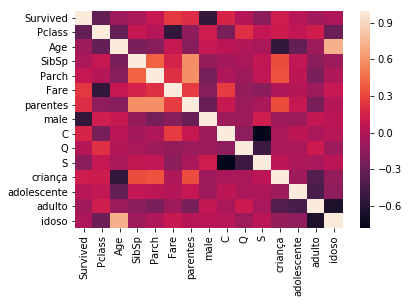

In [274]:
%matplotlib inline
import seaborn as sns

sns.heatmap(titanic_dmy.corr())  

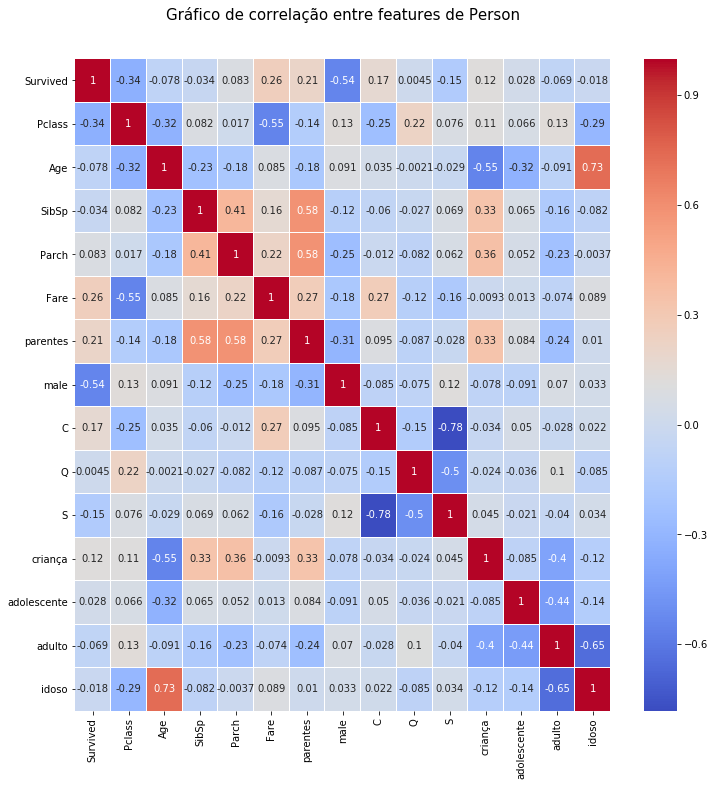

In [275]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.title("Gráfico de correlação entre features de Person", y=1.05, size=15)
sns.heatmap(titanic_dmy.corr(),linewidths=0.1, cmap="coolwarm", annot=True)

# Vamos gerar o nosso modelo para treino!
Vamos separar os nossos dados em dois eixos, "x" e "y"!
- X, nele estarão os dados que usaremos como feature
- Y, estará o dado que vamos tentar prever

In [276]:
titanic_dmy.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FaixaDeIdade', 'Sobrenome', 'parentes', 'male', 'C', 'Q',
       'S', 'criança', 'adolescente', 'adulto', 'idoso'],
      dtype='object')

### Vamos usar as 2 colunas que tem mais correlação com o Survived

In [278]:
features = ["Pclass", "male"]
X = titanic_dmy[features].values


In [279]:
y = titanic_dmy["Survived"].values

Para treinarmos o nosso modelo precisamos separar ele em treino e teste.
- Treino, é aquele que será usado para gerar o nosso modelo
- Teste, nesse é que vamos validar se a nossa previsão foi correta

In [343]:
from sklearn.model_selection 
import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = .30, random_state=2)


SyntaxError: invalid syntax (<ipython-input-343-d29fb23eea90>, line 1)

Separamos nosso dataset deixando 30% para o teste. Definimos um número randomico para sempre garantirmos q vamos manter o mesmos indivíduos no dataset de teste

# Passo 3 - Gerar o modelo

In [339]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_treino, y_treino)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Agora que geramos o nosso modelo, vamos usá-lo!

In [340]:
predict = log_reg.predict(x_teste)

# Passo 4 - Testar a qualidade do modelo

In [341]:
pandas.crosstab(predict,y_teste) #confusion_matrix

col_0,0,1
row_0,,
0,151,25
1,19,72


Olhando os resultados da matriz de confusão ele nos diz que 135 e 69 são os números corretos da predição e 34 e 29 são os números de predições erradas!

In [342]:
from sklearn import metrics
print(metrics.classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.86      0.89      0.87       170
          1       0.79      0.74      0.77        97

avg / total       0.83      0.84      0.83       267



![alt text](https://image.slidesharecdn.com/gubi-agileanalytics-160727182342/95/gubi-agile-analytics-ptbr-69-638.jpg?cb=1469643919)

https://pt.wikipedia.org/wiki/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o

## <font color='blue'>Passo 5 - Melhore <3 </font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

## Sugestões

- Uma coluna para dizer se tava sozinho ou acompanhado (se tem família)
- Use a coluna faixa etária (transforme o texto em número)
- Que tal criar uma featured artificial? Multiplicar a idade pela classe